In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, roc_auc_score


# Loading Heart Dataset

In [2]:
# Load heart disease missing dataset
df = pd.read_csv('heart_disease_missing.csv')

In [3]:
X = df.drop(['target'],axis ='columns')
y = df ['target']

In [4]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509


In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=98)

### Feature selection using pearson correlation
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when selecting features generally drop out features that are highly correllated(r>0.9)  (https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf 
)

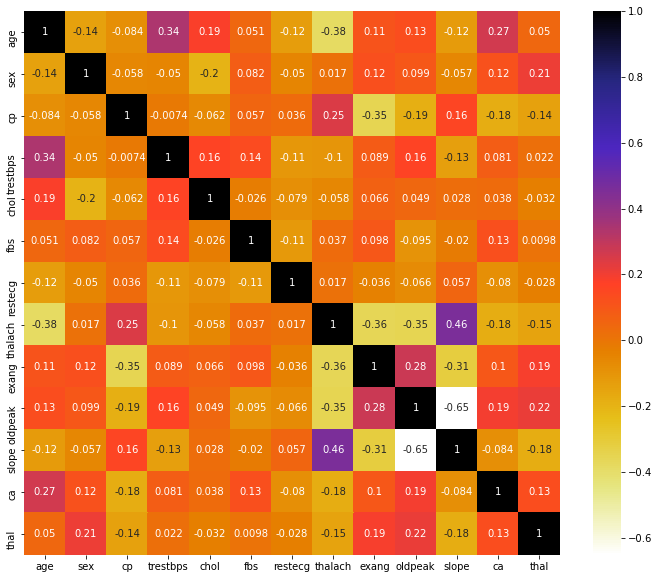

In [6]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor,annot =True,cmap=plt.cm.CMRmap_r)
plt.show()

In [7]:
# source: https://github.com/krishnaik06/Complete-Feature-Selection 
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [8]:
# corr_features = correlation(X_train,0.3)
# print(corr_features)

### Detecting null values in each columns & data cleaning

In [9]:
# detecting null values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     7
chol        10
fbs          0
restecg      5
thalach      4
exang        0
oldpeak     12
slope        2
ca           0
thal         1
target       0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0
6,63,0,2,134.926653,252.023252,0,0.0,171.840974,0,0.106792,2.0,0,1.903701,1


Because 36 rows of data consists null values and they are roughly 15% of total data number. In order to not scew the data set it's safe to drop these rows instead of replacing with approximations.

## Min-Max Normalization
converting numerical features into  standard ranges of values. Here I chose to normalize 'age', 'trestbps', 'chol', 'thalach','oldpeak', 'thal'

In [12]:
df_minmax = df.copy()
minmax_scaler = MinMaxScaler()
df_minmax.iloc[:,[0,3,4,7,9,10,12]] = minmax_scaler.fit_transform(df_minmax.iloc[:,[0,3,4,7,9,10,12]])
df_minmax.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.979167,0,2,0.470641,0.252879,0,2.0,0.244681,0,0.230717,0.5,0,0.544604,1
1,0.291667,0,0,0.388835,0.765412,1,0.0,0.420115,1,0.518970,0.5,0,0.919222,0
2,0.375000,1,2,0.142289,0.415661,0,1.0,0.562440,0,0.024112,1.0,0,0.480494,0
4,0.583333,1,0,0.164763,0.743703,0,1.0,0.482595,1,0.514481,0.5,1,0.815637,0
6,0.708333,0,2,0.417864,0.448420,0,0.0,0.734482,0,0.044719,1.0,0,0.432073,1


## Zscore Normalization

In [13]:
df_z = df.copy()
std_scaler = StandardScaler()
df_z.iloc[:,[0,3,4,7,9,10,12]]= std_scaler.fit_transform(df_z.iloc[:,[0,3,4,7,9,10,12]])
df_z.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2.308501,0,2,0.394359,-1.056653,0,2.0,-1.522725,0,0.147626,-0.626833,0,-0.287450,1
1,-1.259578,0,0,-0.042019,2.045052,1,0.0,-0.612659,1,1.578182,-0.626833,0,1.192740,0
2,-0.827083,1,2,-1.357173,-0.071543,0,1.0,0.125652,0,-0.877726,0.953876,0,-0.540763,0
4,0.254153,1,0,-1.237287,1.913671,0,1.0,-0.288544,1,1.555904,-0.626833,1,0.783455,0
6,0.902894,0,2,0.112831,0.126709,0,0.0,1.018123,0,-0.775457,0.953876,0,-0.732083,1


Without normalization data shows different scales and ranges. After using Min_max normalization, all features will have the same scale but does not handle outliers well, whereas z_score normalization, handles outliers, but the normalized data may not have the exact same scale. However, there is no change to the shapes of pairplots.

## Pairplot using seaborn

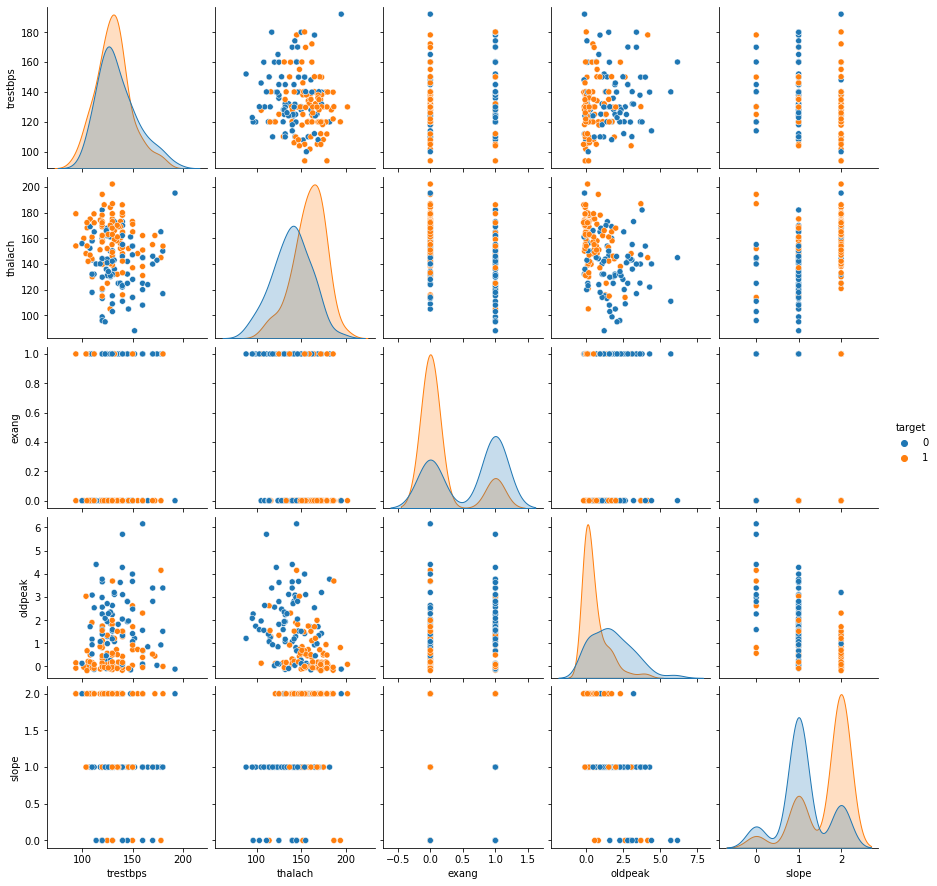

In [14]:
sns.pairplot(df,
            x_vars=['trestbps', 'thalach', 'exang', 'oldpeak', 'slope'],
            y_vars=['trestbps', 'thalach', 'exang', 'oldpeak', 'slope'],
            hue='target')

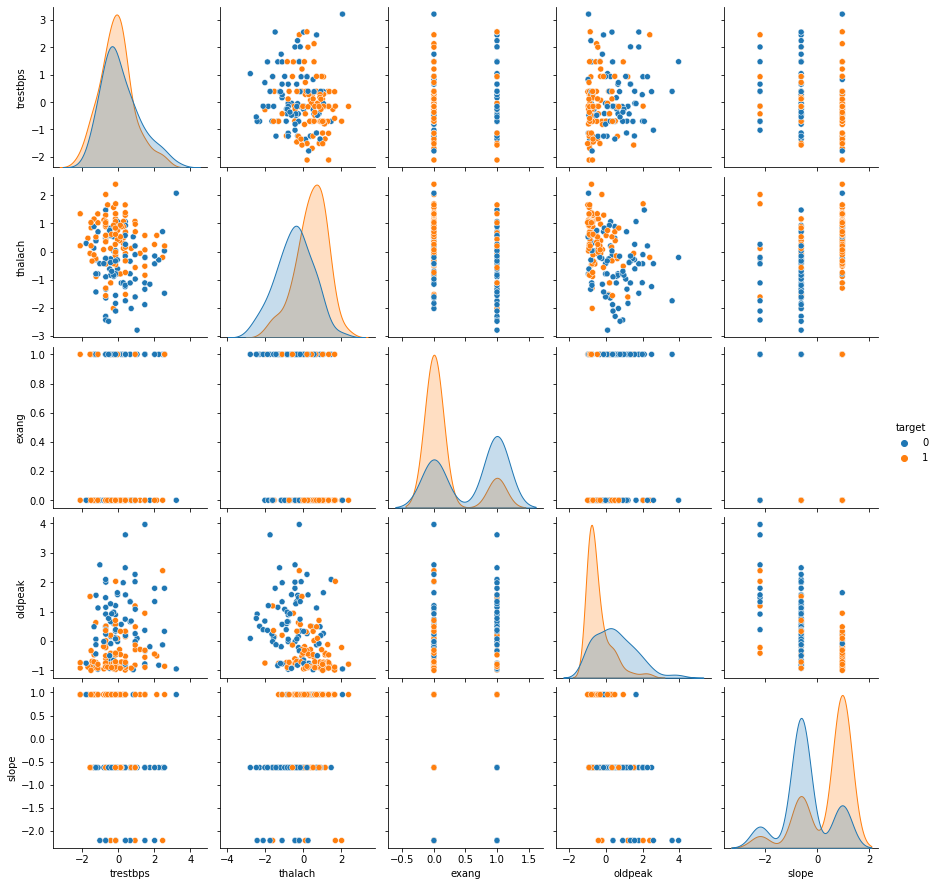

In [15]:
sns.pairplot(df_z,
            x_vars=['trestbps', 'thalach', 'exang', 'oldpeak', 'slope'],
            y_vars=['trestbps', 'thalach', 'exang', 'oldpeak', 'slope'],
            hue='target')

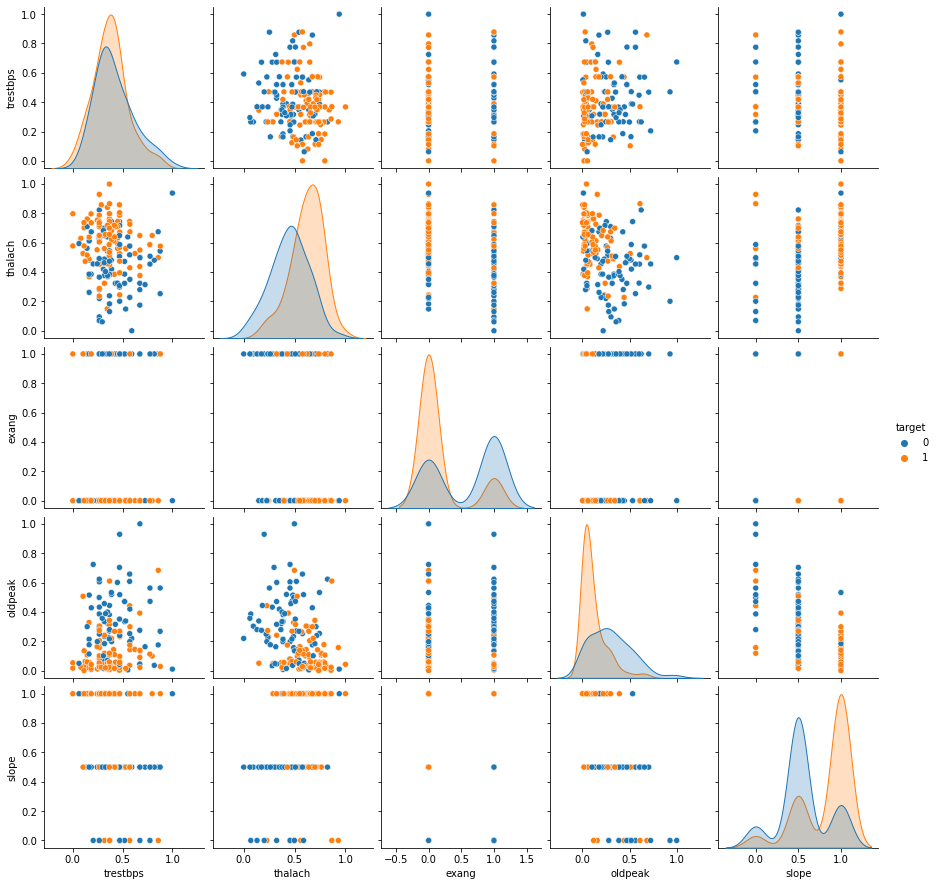

In [16]:
sns.pairplot(df_minmax,
            x_vars=['trestbps', 'thalach', 'exang', 'oldpeak', 'slope'],
            y_vars=['trestbps', 'thalach', 'exang', 'oldpeak', 'slope'],
            hue='target')

## [CM3]
<strong>Calculate and report the correlation coefficient for all pairs of
features. To what extent are the features correlated? Calculate and report
the mean, variance, skew, and kurtosis for all the variables in datasets for
which is makes sense. Do you find any interesting or significant relation-
ships? Briefly explain your observations about the nature of data
and the relationships between the features of the dataset. Do you chosen
subset of features from Heart Disease have any particular pattern on any
of these statistics?</strong>

## Finding correlation r

In [17]:
X_selected = X[['trestbps', 'thalach', 'exang', 'oldpeak', 'slope']]

In [18]:
corr=X_selected.corr()
corr

,trestbps,thalach,exang,oldpeak,slope
trestbps,1.000000,-0.100284,0.088717,0.164742,-0.134180
thalach,-0.100284,1.000000,-0.360246,-0.351900,0.463824
exang,0.088717,-0.360246,1.000000,0.279862,-0.314675
oldpeak,0.164742,-0.351900,0.279862,1.000000,-0.652509
slope,-0.134180,0.463824,-0.314675,-0.652509,1.000000


## Calculate mean, variance, skew and kurtosis

In [19]:
mean =X_selected.mean()
print('Mean is: ')
mean

Mean is: 


trestbps    131.784610
thalach     149.647978
exang         0.344340
oldpeak       1.113106
slope         1.423810
dtype: float64

In [20]:
variance= X_selected.var()
print('Variance is:')
variance

Variance is:


trestbps    326.063277
thalach     487.358850
exang         0.226840
oldpeak       1.577304
slope         0.388904
dtype: float64

In [21]:
skewness = X_selected.skew()
print('Skewness is: ')
skewness

Skewness is: 


trestbps    0.672687
thalach    -0.394100
exang       0.659880
oldpeak     1.224053
slope      -0.604086
dtype: float64

In [22]:
kurt=X_selected.kurt()
print('Kurtosis is: ')
kurt

Kurtosis is: 


trestbps    0.603542
thalach    -0.214108
exang      -1.579550
oldpeak     1.363172
slope      -0.567830
dtype: float64

## KNN

In [23]:
# X_selected = df[['trestbps', 'thalach', 'exang', 'oldpeak', 'slope']]
X_selected=df.iloc[:, 0:13]
y = df ['target']
x_train,x_test,y_train,y_test = train_test_split(X_selected,y,test_size =0.2, random_state =98)
y_test.head()

152    0
199    1
129    0
131    0
197    1
Name: target, dtype: int64

In [24]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)

## CM[4] Accuracy 

In [25]:
acc= accuracy_score(y_test,y_predict)
acc

0.7714285714285715

With the default parameters, accuracy obtained is 0.7714

## Tuning K
### For heart disease data, use Train-validate-test

In [96]:
x_train,x_test,y_train,y_test = train_test_split(X_selected,y,test_size =0.2, random_state =98)
# further split training set into train and validation set
x_train2, x_cv, y_train2, y_cv = train_test_split(x_train,y_train,test_size = 0.1,train_size =0.9,random_state=98)


k_vals=[1, 5, 10, 15, 20, 25, 30, 35,40]
accuracy_list=[]

for i in k_vals:
    knnmodel=KNeighborsClassifier(n_neighbors=i).fit(x_train2,y_train2)
    y_predict = knnmodel.predict(x_cv)
    a_score = accuracy_score(y_cv,y_predict)
    accuracy_list.append(a_score)
    
print(accuracy_list)
   
    

[0.35714285714285715, 0.5, 0.35714285714285715, 0.5, 0.42857142857142855, 0.5, 0.5, 0.6428571428571429, 0.5]


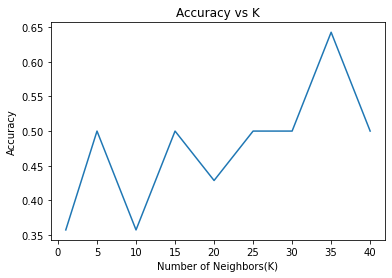

In [97]:
plt.plot(k_vals,accuracy_list)
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()

From the plot above, k=35 gives the highest accuracy.

## [CM6]

In [98]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)

The accuracy_score is:

In [99]:
accuracy_score(y_test,y_predict)

0.6571428571428571

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

In [101]:
f1_score(y_test,y_predict)

0.7272727272727272

In [102]:
print(roc_auc_score(y_test,y_predict))

0.6333333333333334


For <strong> heart disease data set</strong> with <strong>k=35</strong>, the accuracy score, f-score and AUC are 0.6571,0.7272,0.6333 respectively

## [CM 7]

###  Distance weighted KNN 

In [103]:
knn=KNeighborsClassifier(n_neighbors=35,weights='distance')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accu_score=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict)
auc=roc_auc_score(y_test,y_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accu_score, f_score, auc))


Accuracy score: 0.7714285714285715, f_score: 0.8095238095238095 AUC: 0.7583333333333335


###  Uniform weighted KNN  with  manhattan metric

In [34]:
knn=KNeighborsClassifier(n_neighbors=35, metric='manhattan')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accu_score=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict)
auc=roc_auc_score(y_test,y_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accu_score, f_score, auc))


Accuracy score: 0.8, f_score: 0.8372093023255814 AUC: 0.7833333333333334


###  Distance weighted KNN  with  manhattan metric

In [65]:
knn=KNeighborsClassifier(n_neighbors=35, metric='manhattan',weights='distance')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accu_score=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict)
auc=roc_auc_score(y_test,y_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accu_score, f_score, auc))


Accuracy score: 0.8, f_score: 0.8292682926829269 AUC: 0.7916666666666667


###  Distance weighted KNN  with euclidean metric

In [64]:
knn=KNeighborsClassifier(n_neighbors=35, metric='euclidean',weights='distance')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accu_score=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict)
auc=roc_auc_score(y_test,y_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accu_score, f_score, auc))


Accuracy score: 0.7714285714285715, f_score: 0.8095238095238095 AUC: 0.7583333333333335


<strong>Heart disease: </strong>Change weights parameter to <strong> distance </strong> and metric to <strong> manhattan</strong> improved accu_score f_score and auc score to 0.8, 0.8292, 0.7916 respectively. Changing metric to <strong>euclidean</strong> decreases the classifier performance.

### Other KNN Algorithms:

### KNN with ball_tree algorithm

In [90]:
knn_ball_tree=KNeighborsClassifier(n_neighbors=35,algorithm='ball_tree')
knn_ball_tree.fit(x_train,y_train)
y_predict = knn_ball_tree.predict(x_test)
accu_score=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict)
auc=roc_auc_score(y_test,y_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accu_score, f_score, auc))

Accuracy score: 0.6571428571428571, f_score: 0.7272727272727272 AUC: 0.6333333333333334


### KNN with kd_tree algorithm

In [91]:
knn_kd_tree=KNeighborsClassifier( n_neighbors=35,algorithm='kd_tree')
knn_kd_tree.fit(x_train,y_train)
y_predict = knn_kd_tree.predict(x_test)
accu_score=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict)
auc=roc_auc_score(y_test,y_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accu_score, f_score, auc))

Accuracy score: 0.6571428571428571, f_score: 0.7272727272727272 AUC: 0.6333333333333334


### KNN with brute algorithm

In [89]:
knn=KNeighborsClassifier(n_neighbors=35,algorithm='brute')
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
accu_score=accuracy_score(y_test,y_predict)
f_score=f1_score(y_test,y_predict)
auc=roc_auc_score(y_test,y_predict)
print("Accuracy score: %s, f_score: %s AUC: %s" % (accu_score, f_score, auc))

Accuracy score: 0.6571428571428571, f_score: 0.7272727272727272 AUC: 0.6333333333333334


From the above calculations, different KNN algorithms have no effect on to the classifier performance. This is possible due to the limit from classifer. As stated from the online document of sklearn.neighbors.KNeighborsClassifier, "Note: fitting on sparse input will override the setting of this parameter, using brute force." Therefore with the given dataset, it's not possible evaluate the effects of different NN algorithms on to classifier performance.   <p> source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html </p>

# Feature descriptions
### Below is the group of features presents in the dataset segregated by their type (numerical, categorical, ordinal, binary)

# Binary
### sex (0 = female; 1 = male)
### fbs: Fasting blood sugar > 120 mg/dl
### exang: Exercise induced angina (0 = no; 1 = yes)
# Categorical
### cp: Chest pain type (0 = Asymptomatic angina; 1 = Atypical angina; 2 = Non-angina; 3 = Typical angina)
### restecg: Resting ECG (0 = Left ventricular hypertrophy; 1 = Normal; 2 = ST-T wave abnormality)
### slope: Slope of the peak exercise ST segment (0 = downsloping; 1 = upsloping; 2 = flat)
### thal: Thalium stress test result (0 = NA; 1 = Fixed defect; 2 = Normal; 3 = Reversible defect)
# Ordinal
### ca: number of major vessels (0-3) colored by flourosopy
# Numeric
### age
### oldpeak: ST depression induced by exercise relative to rest
### trestbps: Resting blood pressure
### chol: Serum cholestoral in mg/dl
### thalach: Maximum heart rate achieved during thalium stress test
# Target
### target: 1 = heart disease; 0 = no heart disease